In [1]:
# matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [13]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. 데이터프레임 확인



In [14]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


데이터개수 600개. 칼럼수 12개

**칼럼 확인**

title : 영화의 제목

distributor : 배급사

genre : 장르

release_time : 개봉일

time : 상영시간(분)

screening_rat : 상영등급

director : 감독이름

dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

num_staff : 스텝수

num_actor : 주연배우수

box_off_num : 관객수

#2. 데이터 전처리



In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
missing = train.loc[train['dir_prev_bfnum'].isna(), 'dir_prev_num']

# 'dir_prev_num'이 0인지 확인
all_zero = (missing == 0).all()

# 결과 출력
if all_zero:
    print("모든 'dir_prev_bfnum' 결측값 행에서 'dir_prev_num' 값이 0입니다.")
else:
    print("일부 'dir_prev_bfnum' 결측값 행에서 'dir_prev_num' 값이 0이 아닙니다.")

모든 'dir_prev_bfnum' 결측값 행에서 'dir_prev_num' 값이 0입니다.


In [9]:
train['dir_prev_bfnum']=train['dir_prev_bfnum'].fillna(0)
train['dir_prev_bfnum'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: dir_prev_bfnum
Non-Null Count  Dtype  
--------------  -----  
600 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


dir_prev_bfnum 칼럼에만 270개의 결측값이 있었음

감독의 이전작품의 관객수를 의미하므로 이전작품 개수가 0이라서 결측값인건지 확인함. >> 맞았음

fillna()을 사용해 dir_prev_bfnum 결측값을 0으로 대체

In [15]:
train['release_time']=pd.to_datetime(train['release_time'])
train['release_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 600 entries, 0 to 599
Series name: release_time
Non-Null Count  Dtype         
--------------  -----         
600 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 KB


* release_time 을 datetime으로 변환

In [11]:
train['distributor'][train['distributor']=='시네마 달']='시네마달'
train[train['distributor']=='시네마 달']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


* '시네마 달'과 '시네마달'을 '시네마달'로 통일함

# **3. 시각화 및 분석**

## 1. 장르별 관객수


In [37]:
# 절대적인 관객수 계산

sort=train.groupby('genre')['box_off_num'].agg('sum').sort_values(ascending=False)
print(sort)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64


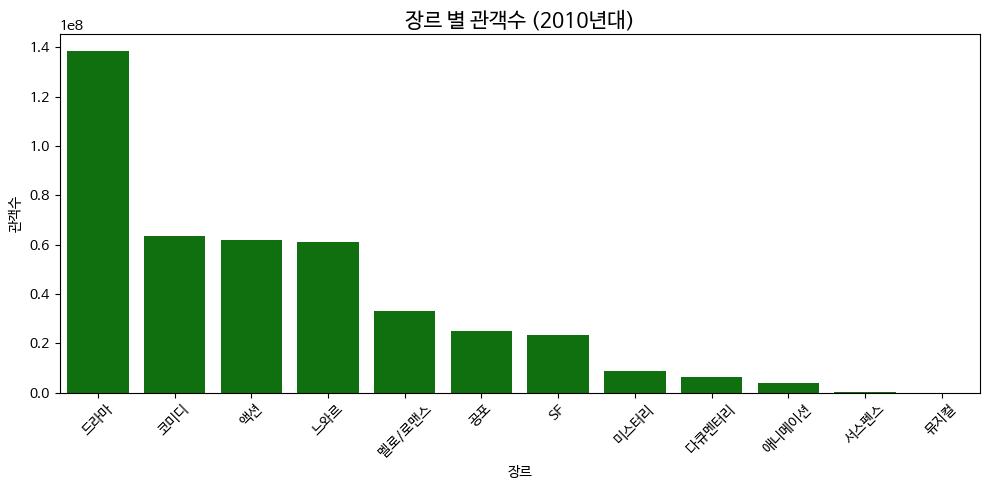

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre',y='box_off_num',data=train,ci=None,estimator='sum',order=sort.index,color='green')

plt.xticks(rotation=45)
plt.xlabel('장르')
plt.ylabel('관객수')
plt.title('장르 별 관객수 (2010년대)',fontsize=15)
plt.tight_layout()
plt.show()

In [74]:
# 정확한 비교를 위해 평균 관객수 구하기

sort2=train.groupby('genre')['box_off_num'].agg('mean').sort_values(ascending=False)
genre_count=train['genre'].value_counts()
print('장르 별 평균 관객수:\n',sort2,'\n','장르 빈도:\n',genre_count)

장르 별 평균 관객수:
 genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64 
 장르 빈도:
 genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: count, dtype: int64


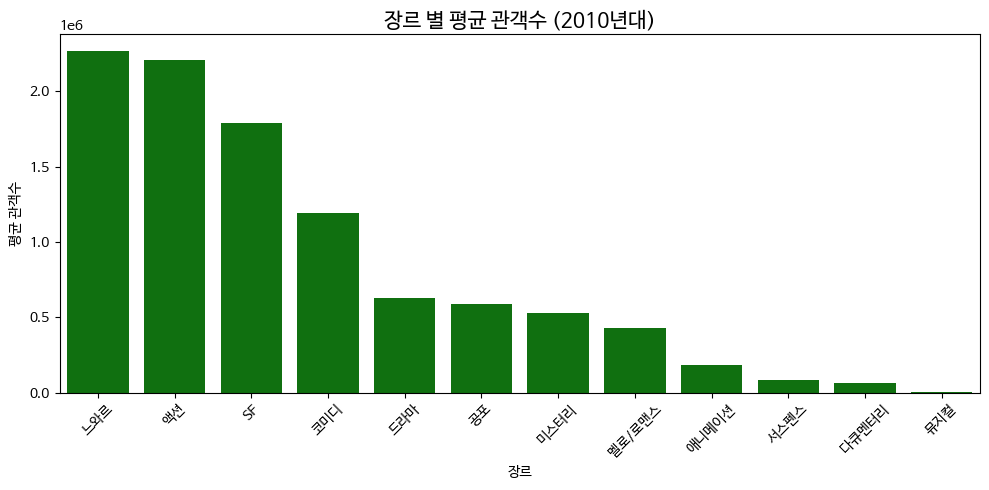

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(x='genre',y='box_off_num',data=train,ci=None,order=sort2.index,color='green')

plt.xticks(rotation=45)
plt.xlabel('장르')
plt.ylabel('평균 관객수')
plt.title('장르 별 평균 관객수 (2010년대)',fontsize=15)
plt.tight_layout()
plt.show()

## 2. 계절에 따른 개봉 장르

In [78]:
# 개봉날짜의 월만 추출하여 새로운 칼럼 생성

train['release_time_month']=train['release_time'].dt.month
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,11


In [82]:
from ast import IfExp
# 계절 분류 함수 정의
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# train 데이터프레임에 'season' 컬럼 추가
train["season"] = train["release_time_month"].apply(get_season)

In [81]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_month,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,11,Fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,11,Fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,6,Summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7,Summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,11,Fall
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211,10,Fall
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,5,Spring
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523,10,Fall
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,9,Fall
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868,3,Spring


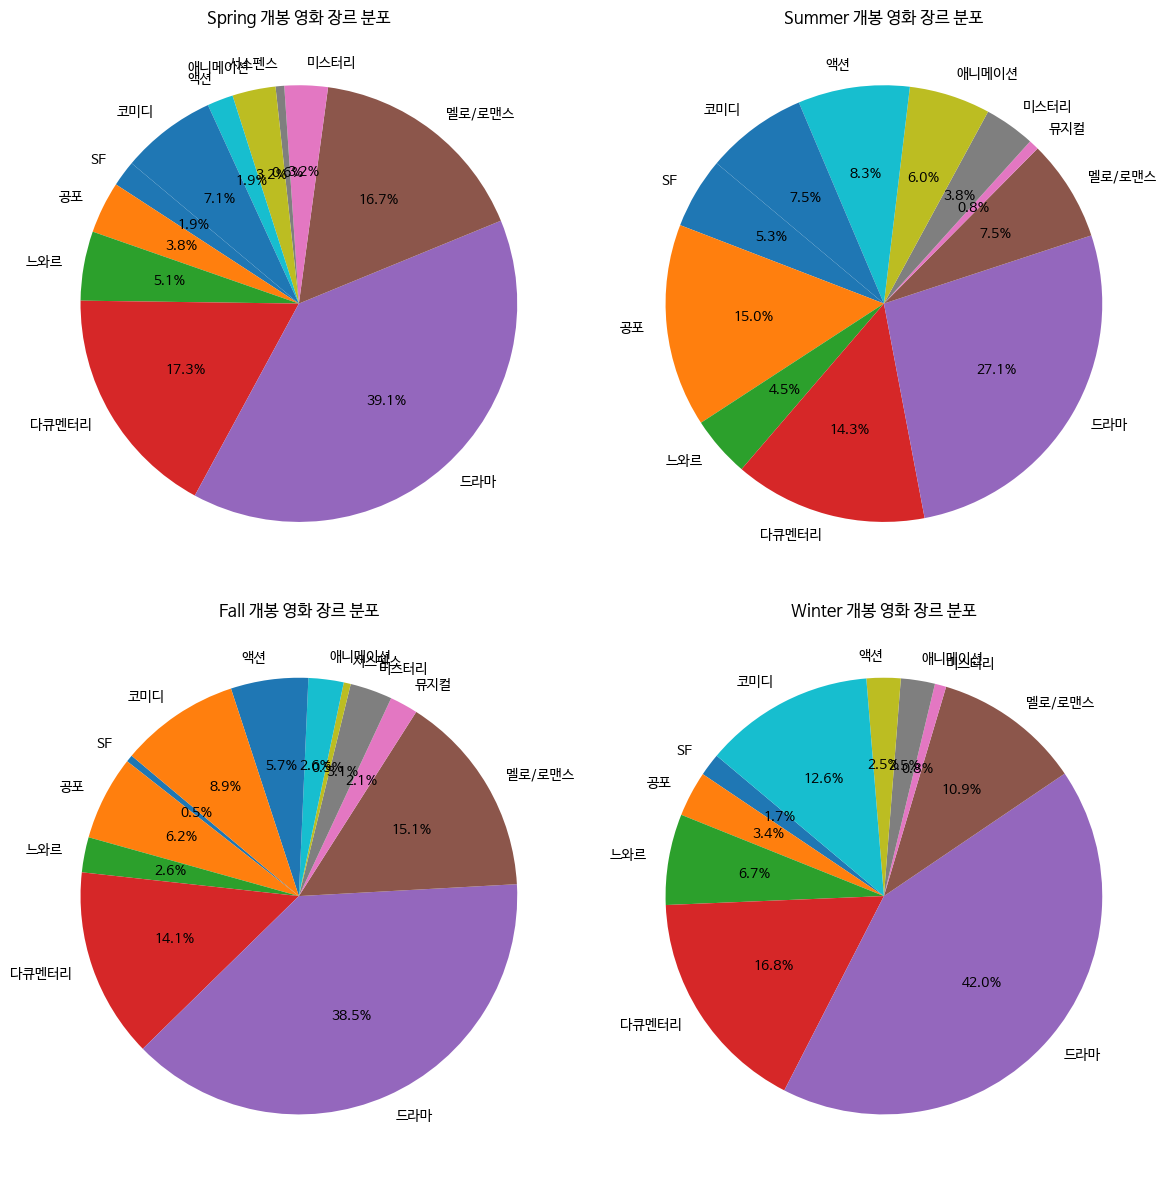

In [87]:
# 계절 별 장르 개수 계산
season_genre_counts = train.groupby('season')['genre'].value_counts().unstack()

seasons = ["Spring", "Summer", "Fall", "Winter"]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, season in enumerate(seasons):
    ax = axes[i // 2, i % 2]
    genre_counts = season_genre_counts.loc[season].dropna()
    ax.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140)
    ax.set_title(f"{season} 개봉 영화 장르 분포")

plt.tight_layout()
plt.show()

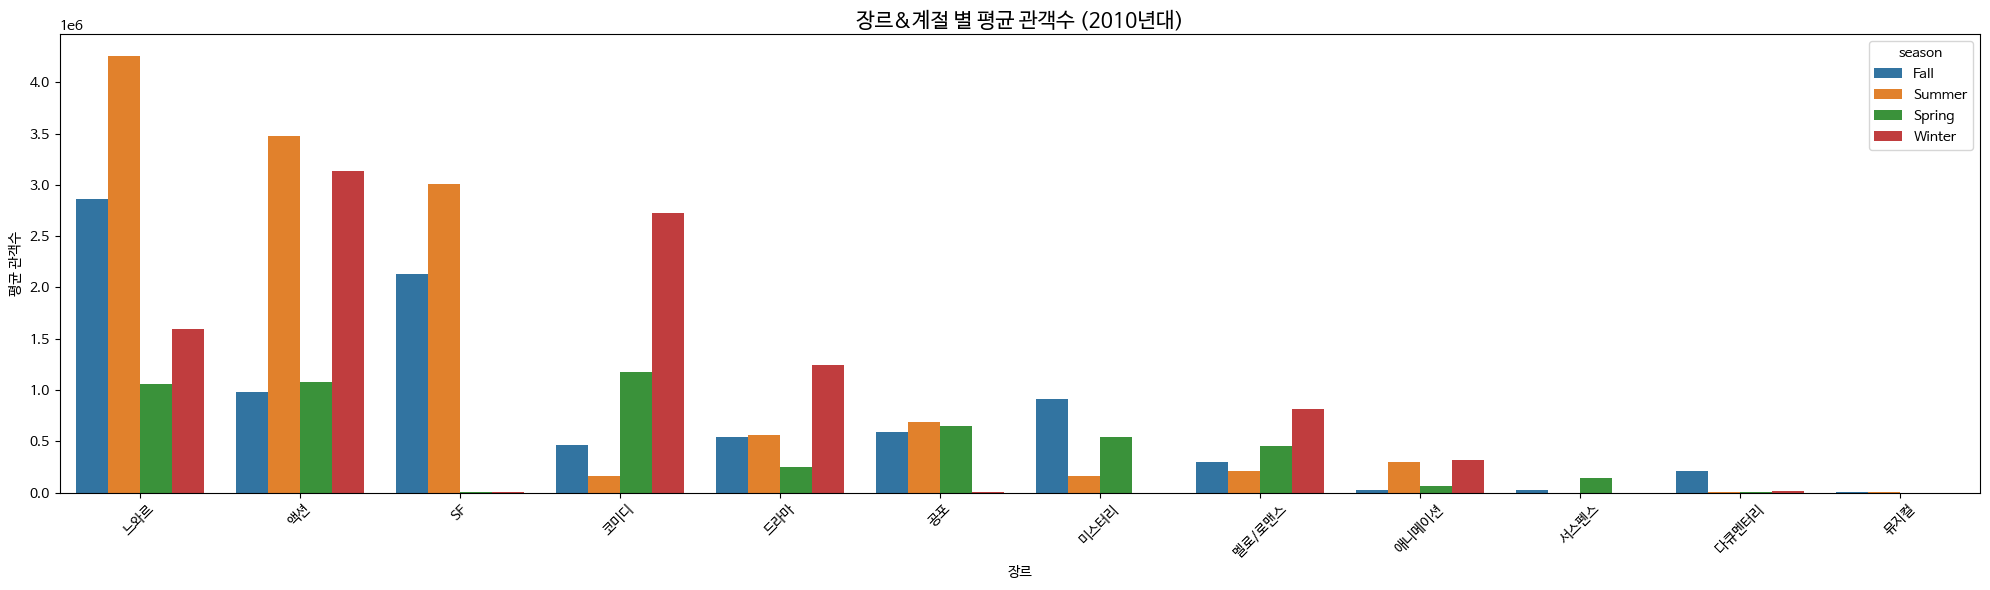

In [91]:
# 장르, 계절 별 평균 관객수 시각화

plt.figure(figsize=(20,6))
sns.barplot(x='genre',y='box_off_num',hue='season',data=train,ci=None,order=sort2.index)

plt.xticks(rotation=45)
plt.xlabel('장르')
plt.ylabel('평균 관객수')
plt.title('장르&계절 별 평균 관객수 (2010년대)',fontsize=15)
plt.tight_layout()
plt.show()

# [결과 해석 및 결론]


(1) 장르 별 관객수 vs 평균 관객수

* 절대적 관객수 순위: 드라마 >>> 코미디, 액션, 느와르 >> 멜로 > 공포, SF > 미스터리, 다큐멘터리, 애니메이션 > 서스펜스, 뮤지컬  
* 절대적인 관객수는 드라마가 압도적으로 많음 (약 1억 4천명)
* 액션, 드라마, 코미디 장르가 가장 많은 누적 관객 수를 기록함.
* 다큐멘터리, 뮤지컬, 애니메이션 등은 상대적으로 관객 수가 낮음.
* 대체로 대중적인 장르가 더 많은 관객을 확보하는 경향을 보임.

* **평균 관객수 순위**: 느와르, 액션 >> SF >> 코미디 >> 드라마, 공포, 미스터리, 멜로 >> 애니메이션 > 서스펜스, 다큐멘터리 > 뮤지컬
* 장르별 누적 관객 수와 달리, 장르별 평균 관객 수는 다르게 나타남. 일부 장르는 작품 수가 적어도 평균 관객 수가 높을 수 있음. 느와르, SF 장르가 평균적으로 높은 관객 수를 보이는 특징이 있음.


(2) 계절과 장르, 관객수

봄(3~5월) – 로맨스, 코미디, 드라마 장르 영화가 주로 개봉됨.
* 봄은 감성적인 분위기에 맞춰 로맨틱 코미디 영화가 강세를 보이는 시기.


여름(6~8월) – 다른 계절에 비해 공포 영화가 많이 개봉함.
액션, SF, 공포 장르의 영화가 가장 많이 개봉됨.
* 여름철 납량 효과, 시원한 극장에서 즐기려는 관객 심리 등의 이유를 반영한 결과.
* 액션 장르도 비슷한 이유로, 다른 계절에 비해 여름에 많이 개봉했다고 볼 수 있음.

가을(9~11월) – 느와르, 미스터리 장르 영화 개봉이 많음.
* 가을은 영화제 시즌(부산국제영화제 등)과 맞물려 작품성 높은 영화들이 개봉하는 경향이 있으며, 할리우드에서는 아카데미 시즌을 겨냥한 작품들이 나오는 시기.

겨울(12~2월) – 애니메이션, 코미디, 드라마 장르가 많이 개봉됨.
* 연말연시와 방학 시즌을 고려한 배급 전략이 반영되었다고 유추 가능.



[결론]

- 드라마 관객수가 많은 이유는 단순히 많은 영화가 개봉했기 때문이라고 유추 가능.
- 다큐멘터리의 경우, 개봉작수는 2위지만 관객수는 하위권이므로 비교적 인기가 덜 한 장르라고 할 수 있음.
- 장르별 영화 개봉 수와 흥행 성적 간의 관계는 다를 수 있음.
- 작품 수는 적지만 충성도 높은 관객층을 가진 장르도 존재함.
- 흥행을 목표로 한다면 액션/드라마/코미디 장르를 선택하는 것이 유리함.